## Prep

In [5]:
# import sys
# !{sys.executable} -m pip install llama-index
# !{sys.executable} -m pip install llama-index-multi-modal-llms-anthropic
# !{sys.executable} -m pip install llama-index-embeddings-huggingface
# !{sys.executable} -m pip install llama-index-vector-stores-qdrant
# !{sys.executable} -m pip install matplotlib

In [6]:
#!{sys.executable} -m pip install anthropic

In [7]:
import urllib.request
import os
os.environ['ANTHROPIC_API_KEY'] = 'XXXXXX'

In [9]:
#url = 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/examples/data/images/prometheus_paper_card.png'
#filename = 'prometheus_paper_card.png'
#urllib.request.urlretrieve(url, filename)

## Use Anthropic to understand an image from local file

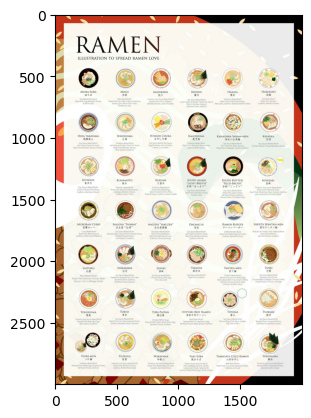

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML

img = Image.open("./ramen_chart.jpg")
plt.imshow(img)

In [14]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal

image_documents = SimpleDirectoryReader(
    input_files=["ramen_chart.jpg"]
).load_data()

# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(max_tokens=300)

In [15]:
response = anthropic_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [16]:
print(response)

The image shows an illustrated guide to different types of ramen, a popular Japanese noodle dish. It contains 30 circular images, each depicting a bowl of ramen with various toppings and ingredients. The bowls are arranged in a grid format on a light background with autumn leaves bordering the edges.

Below each ramen illustration is the name of that specific style of ramen, along with a brief description of its key ingredients, flavors, and regional origins within Japan. Some examples include Abura-Soba, Akayu, Asahikawa, Banshu, and Hakata ramen.

The illustrations showcase the diversity of ramen, with varying colors and toppings visible in each bowl, such as noodles, meats, vegetables, eggs, and garnishes. The image serves as a visual guide to help ramen enthusiasts identify and appreciate the many regional specialties and variations of this beloved dish found throughout Japan.


## Use Anthropic to understand an image from URL

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from llama_index.core.multi_modal_llms.generic_utils import load_image_urls


image_urls = [
    "https://https://i.redd.it/239vdkkq1hl51.jpg",
]

image_url_documents = load_image_urls(image_urls)

In [ ]:
response = anthropic_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_url_documents,
)

print(response)

## Structured Output Parsing from an Image

In [25]:
from pydantic import BaseModel
from typing import List

class RamenInfo(BaseModel):
    """List of Ramen info."""

    name: str
    broth: str
    meat: str
    other_ingredients: list
    row: int
    column: int

class RamenList(BaseModel):
    """List of Ramen"""
    
    name: str
    ramens: List[RamenInfo]

In [34]:
from llama_index.multi_modal_llms.anthropic import AnthropicMultiModal
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

prompt_template_str = """\
Can you get the ramen info in the image and return the answer?\
Please retrieve information about Muroran Curry\

Make sure the answer is a JSON format corresponding to a Pydantic schema. The Pydantic schema is given below.

"""

# Initiated Anthropic MultiModal class
anthropic_mm_llm = AnthropicMultiModal(max_tokens=300)


llm_program = MultiModalLLMCompletionProgram.from_defaults(
    output_cls=RamenList,
    image_documents=image_documents,
    prompt_template_str=prompt_template_str,
    multi_modal_llm=anthropic_mm_llm,
    verbose=True,
)

In [35]:
response = llm_program()

> Raw output: {
  "name": "Muroran Curry",
  "ramens": [
    {
      "name": "Muroran Curry",
      "broth": "Curry-Based Broth",
      "meat": "Roast Pork, Bamboo Shoots",
      "other_ingredients": [
        "Bean Sprouts, Cabbage, Butter"
      ],
      "row": 5,
      "column": 1
    }
  ]
}
